In [13]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from explore.gcp.storage import gcp
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.exploratory_visuals import StatisticPlots

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [14]:
df = gcp.read_df_from_bucket(bucket_name="processed_fbref_db", blob_name="processed_passing.csv")

[03/21/24 18:39:55] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=194978;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=624098;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=167312;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=329758;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [15]:
df.head()

rk               player nation    pos           squad            comp  \
0   1  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA     DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN     DF       Marseille         Ligue 1   

    age    born   90s  passes_completed  passes_attempted  \
0  26.0  1990.0  24.3             884.0            1176.0   
1  21.0  1995.0   1.5              29.0              44.0   
2  21.0  1995.0   5.7              87.0             120.0   
3  30.0  1986.0  11.7             625.0             776.0   
4  27.0  1989.0   5.5             310.0             333.0   

   pass_completion_pct  total_pass_distance  progressive_pass_distance  \
0                 75.2              14197.0                     6422.0   
1                 65.9                376.0                       77.0   
2                 72.5               1174.0                      325.0   
3                 80.5              10991.0                     4535.0   
4                 93.1               5550.0                     1557.0   

   short_passes_completed  short_passes_attempted  short_pass_completion_pct  \
0                   479.0                   532.0                       90.0   
1                    24.0                    30.0                       80.0   
2                    50.0                    60.0                       83.3   
3                   273.0                   294.0                       92.9   
4                   126.0                   128.0                       98.4   

   medium_passes_completed  medium_passes_attempted  \
0                    311.0                    431.0   
1                      2.0                      5.0   
2                     25.0                     35.0   
3                    287.0                    333.0   
4                    148.0                    155.0   

   medium_pass_completion_pct  long_passes_completed  long_passes_attempted  \
0                        72.2                   74.0                  152.0   
1                        40.0                    2.0                    3.0   
2                        71.4                    4.0                    8.0   
3                        86.2                   58.0                  120.0   
4                        95.5                   24.0                   34.0   

   long_pass_completion_pct  assists  xag   xa  assists_minus_xag  key_passes  \
0                      48.7        1  2.1  1.8               -1.1        18.0   
1                      66.7        0  0.0  0.0                0.0         0.0   
2                      50.0        0  0.2  0.1               -0.2         3.0   
3                      48.3        0  0.5  0.8               -0.5        10.0   
4                      70.6        0  0.0  0.0                0.0         0.0   

   passes_into_final_third  passes_into_penalty_area  \
0                     63.0                      28.0   
1                      2.0                       1.0   
2                      8.0                       7.0   
3                     55.0                      20.0   
4                      8.0                       0.0   

   crosses_into_penalty_area  progressive_passes     season general_pos  \
0                        6.0                92.0  2017-2018    Defender   
1                        1.0                 3.0  2017-2018  Midfielder   
2                        1.0                17.0  2017-2018  Midfielder   
3                        7.0                81.0  2017-2018    Defender   
4                        0.0                12.0  2017-2018    Defender   

  age_range      country continent  player_id  
0     25-29  Netherlands    Europe          1  
1     20-24      England    Europe          2  
2     20-24      England    

In [16]:
describe_data(df)

Data Types  Null Counts  Null %  Unique Values  \
rk                              int64            0    0.00           2920   
age                           float64            3    0.02             29   
born                          float64            3    0.02             32   
90s                           float64            0    0.00            381   
passes_completed              float64           22    0.12           1951   
passes_attempted              float64           22    0.12           2258   
pass_completion_pct           float64          133    0.70            564   
total_pass_distance           float64           22    0.12          11866   
progressive_pass_distance     float64           22    0.12           7530   
short_passes_completed        float64           22    0.12           1022   
short_passes_attempted        float64           22    0.12           1110   
short_pass_completion_pct     float64          301    1.57            453   
medium_passes_completed       float64           22    0.12           1036   
medium_passes_attempted       float64           22    0.12           1141   
medium_pass_completion_pct    float64          443    2.32            558   
long_passes_completed         float64           22    0.12            434   
long_passes_attempted         float64           22    0.12            760   
long_pass_completion_pct      float64         1112    5.82            694   
assists                         int64            0    0.00             22   
xag                           float64           22    0.12            135   
xa                            float64           22    0.12            125   
assists_minus_xag             float64           22    0.12            120   
key_passes                    float64           22    0.12            113   
passes_into_final_third       float64           22    0.12            283   
passes_into_penalty_area      float64           22    0.12            103   
crosses_into_penalty_area     float64           22    0.12             49   
progressive_passes            float64           22    0.12            316   
player_id                       int64            0    0.00           6310   

                               Min      Max  Median     Mean  Std Dev  \
rk                             1.0   2920.0  1366.0  1371.01   796.36   
age                           14.0     42.0    25.0    25.34     4.53   
born                        1977.0   2008.0  1995.0  1994.35     4.92   
90s                            0.0     38.0    11.8    13.44    10.64   
passes_completed               0.0   2919.0   339.0   475.47   465.22   
passes_attempted               0.0   3365.0   457.0   604.94   560.66   
pass_completion_pct            0.0    100.0    77.1    76.03    11.14   
total_pass_distance            0.0  58361.0  5579.0  8490.34  8713.96   
progressive_pass_distance      0.0  36334.0  1682.5  3124.04  3877.95   
short_passes_completed         0.0   1801.0   151.0   213.13   212.78   
short_passes_attempted         0.0   1913.0   177.5   243.56   235.96   
short_pass_completion_pct      0.0    100.0    87.5    86.11    10.41   
medium_passes_completed        0.0   1638.0   120.0   194.20   213.27   
medium_passes_attempted        0.0   1740.0   153.0   228.99   237.56   
medium_pass_completion_pct     0.0    100.0    82.8    81.06    13.60   
long_passes_completed          0.0    677.0    27.0    53.26    69.22   
long_passes_attempted          0.0   1348.0    51.0    96.54   130.05   
long_pass_completion_pct       0.0    100.0    55.3    55.53    18.43   
assists                        0.0     21.0     0.0     1.15     1.92   
xag                            0.0     20.0     0.5     1.18     1.68   
xa                             0.0     16.2     0.5     1.10     1.53   
assists_minus_xag             -8.7      9.0     0.0    -0.03     0.94   
key_passes                     0.0    136.0     6.0    11.34    14.66   
passes_into_final_third        0.0    450

In [17]:
stat_plots = StatisticPlots(df)

In [18]:
df.columns

Index(['rk', 'player', 'nation', 'pos', 'squad', 'comp', 'age', 'born', '90s',
       'passes_completed', 'passes_attempted', 'pass_completion_pct',
       'total_pass_distance', 'progressive_pass_distance',
       'short_passes_completed', 'short_passes_attempted',
       'short_pass_completion_pct', 'medium_passes_completed',
       'medium_passes_attempted', 'medium_pass_completion_pct',
       'long_passes_completed', 'long_passes_attempted',
       'long_pass_completion_pct', 'assists', 'xag', 'xa', 'assists_minus_xag',
       'key_passes', 'passes_into_final_third', 'passes_into_penalty_area',
       'crosses_into_penalty_area', 'progressive_passes', 'season',
       'general_pos', 'age_range', 'country', 'continent', 'player_id'],
      dtype='object')

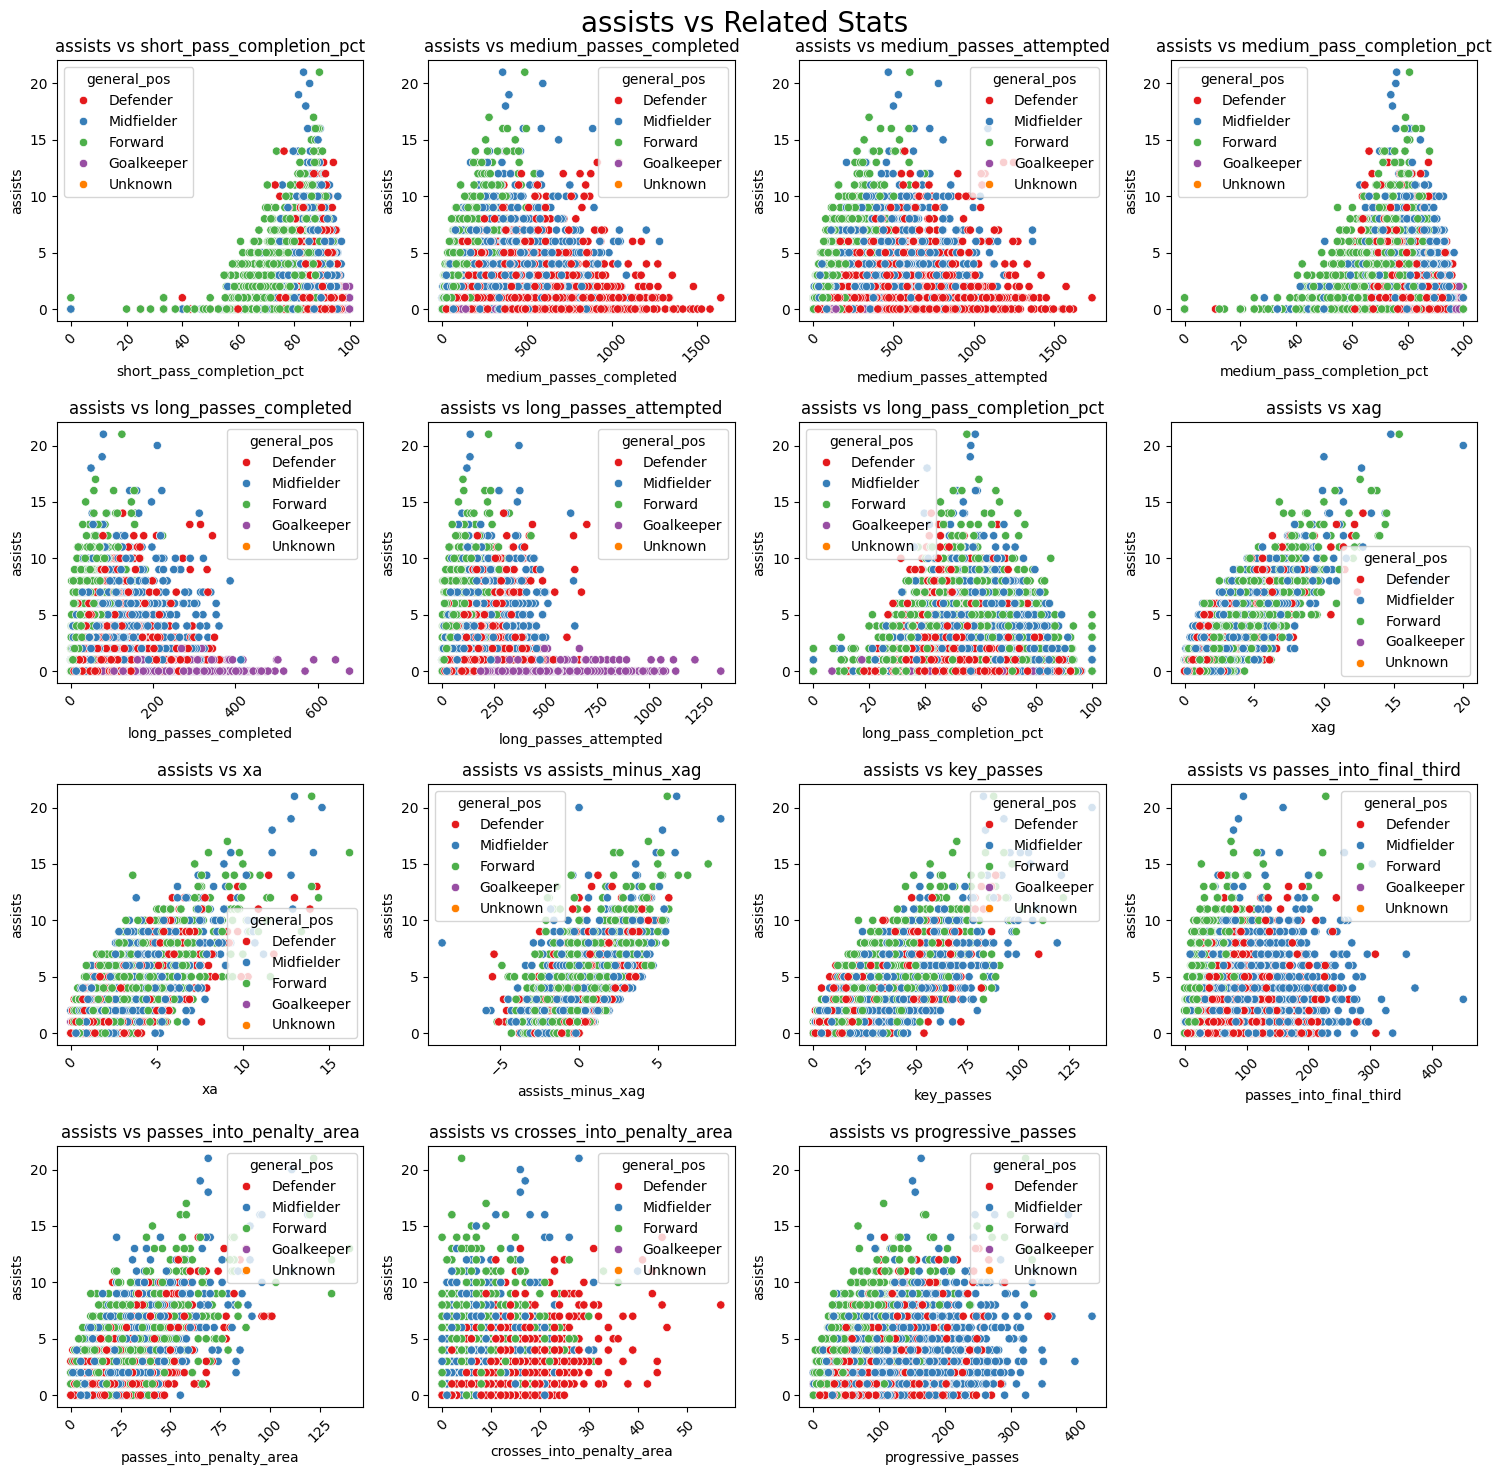

In [19]:
cols = df.columns[-22:-6]
stat_plots.relationships(y='assists', X=cols, nrows=4, ncols=4, hue='general_pos', palette='Set1')

In [20]:
cols = df.columns[9:-6]

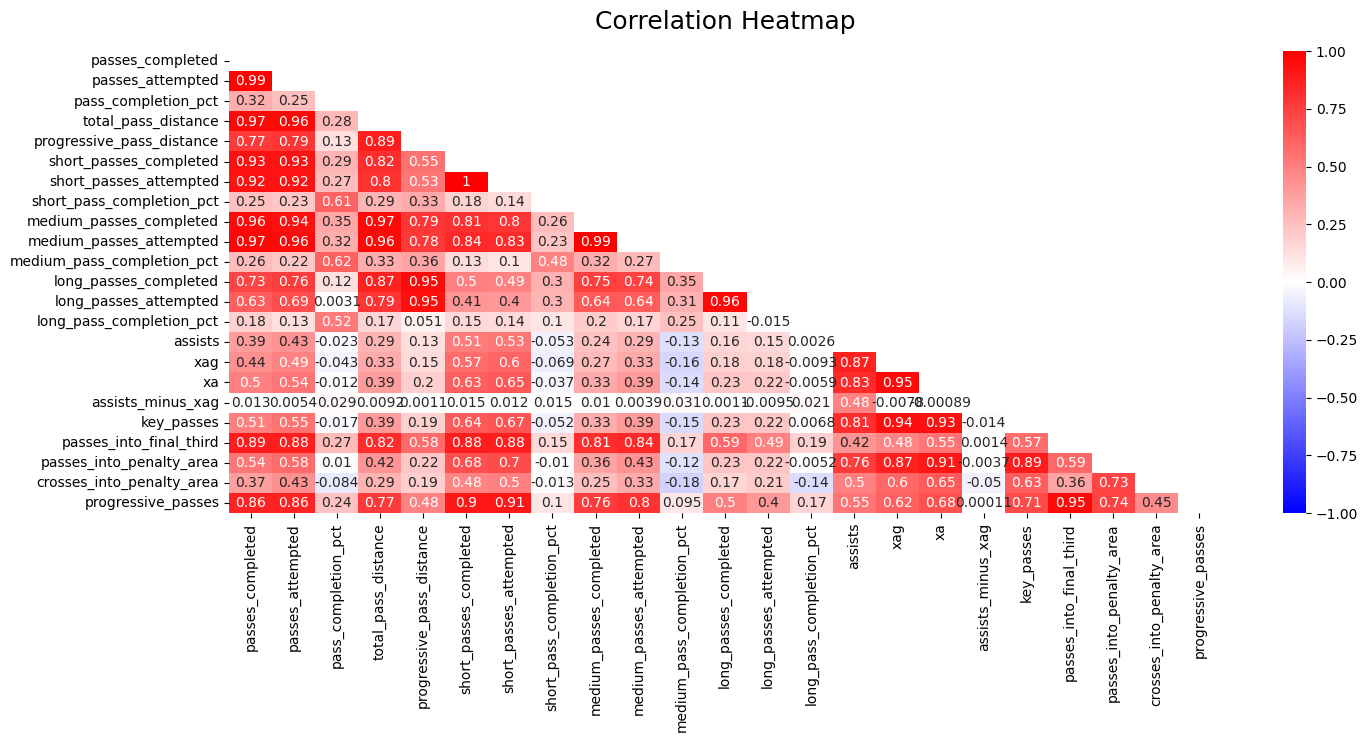

In [21]:
stat_plots.correlation_matrix(vars=cols)

## Investigation

Analyse average passing stats for each season and league

In [22]:
df.head()

rk               player nation    pos           squad            comp  \
0   1  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA     DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN     DF       Marseille         Ligue 1   

    age    born   90s  passes_completed  passes_attempted  \
0  26.0  1990.0  24.3             884.0            1176.0   
1  21.0  1995.0   1.5              29.0              44.0   
2  21.0  1995.0   5.7              87.0             120.0   
3  30.0  1986.0  11.7             625.0             776.0   
4  27.0  1989.0   5.5             310.0             333.0   

   pass_completion_pct  total_pass_distance  progressive_pass_distance  \
0                 75.2              14197.0                     6422.0   
1                 65.9                376.0                       77.0   
2                 72.5               1174.0                      325.0   
3                 80.5              10991.0                     4535.0   
4                 93.1               5550.0                     1557.0   

   short_passes_completed  short_passes_attempted  short_pass_completion_pct  \
0                   479.0                   532.0                       90.0   
1                    24.0                    30.0                       80.0   
2                    50.0                    60.0                       83.3   
3                   273.0                   294.0                       92.9   
4                   126.0                   128.0                       98.4   

   medium_passes_completed  medium_passes_attempted  \
0                    311.0                    431.0   
1                      2.0                      5.0   
2                     25.0                     35.0   
3                    287.0                    333.0   
4                    148.0                    155.0   

   medium_pass_completion_pct  long_passes_completed  long_passes_attempted  \
0                        72.2                   74.0                  152.0   
1                        40.0                    2.0                    3.0   
2                        71.4                    4.0                    8.0   
3                        86.2                   58.0                  120.0   
4                        95.5                   24.0                   34.0   

   long_pass_completion_pct  assists  xag   xa  assists_minus_xag  key_passes  \
0                      48.7        1  2.1  1.8               -1.1        18.0   
1                      66.7        0  0.0  0.0                0.0         0.0   
2                      50.0        0  0.2  0.1               -0.2         3.0   
3                      48.3        0  0.5  0.8               -0.5        10.0   
4                      70.6        0  0.0  0.0                0.0         0.0   

   passes_into_final_third  passes_into_penalty_area  \
0                     63.0                      28.0   
1                      2.0                       1.0   
2                      8.0                       7.0   
3                     55.0                      20.0   
4                      8.0                       0.0   

   crosses_into_penalty_area  progressive_passes     season general_pos  \
0                        6.0                92.0  2017-2018    Defender   
1                        1.0                 3.0  2017-2018  Midfielder   
2                        1.0                17.0  2017-2018  Midfielder   
3                        7.0                81.0  2017-2018    Defender   
4                        0.0                12.0  2017-2018    Defender   

  age_range      country continent  player_id  
0     25-29  Netherlands    Europe          1  
1     20-24      England    Europe          2  
2     20-24      England    

In [23]:
# filter out players who have not played any minutes
df = df.loc[df['90s'] > 0]

In [24]:
# create per 90 stats
stat_cols = df.columns[9:-6].tolist()

for col in stat_cols:
    df[f"{col}_per_90"] = df[col] / df['90s']

In [25]:
# get per 90 columns
per_90_cols = [col for col in df.columns if 'per_90' in col]

In [26]:
avgs_df = df.groupby(['season', 'comp'])[per_90_cols].mean().reset_index()
avgs_df.columns = ['season', 'comp'] + [''.join(('avg_', col)) for col in avgs_df if col not in ['season', 'comp']]

In [27]:
avgs_cols = avgs_df.columns[2:].tolist()

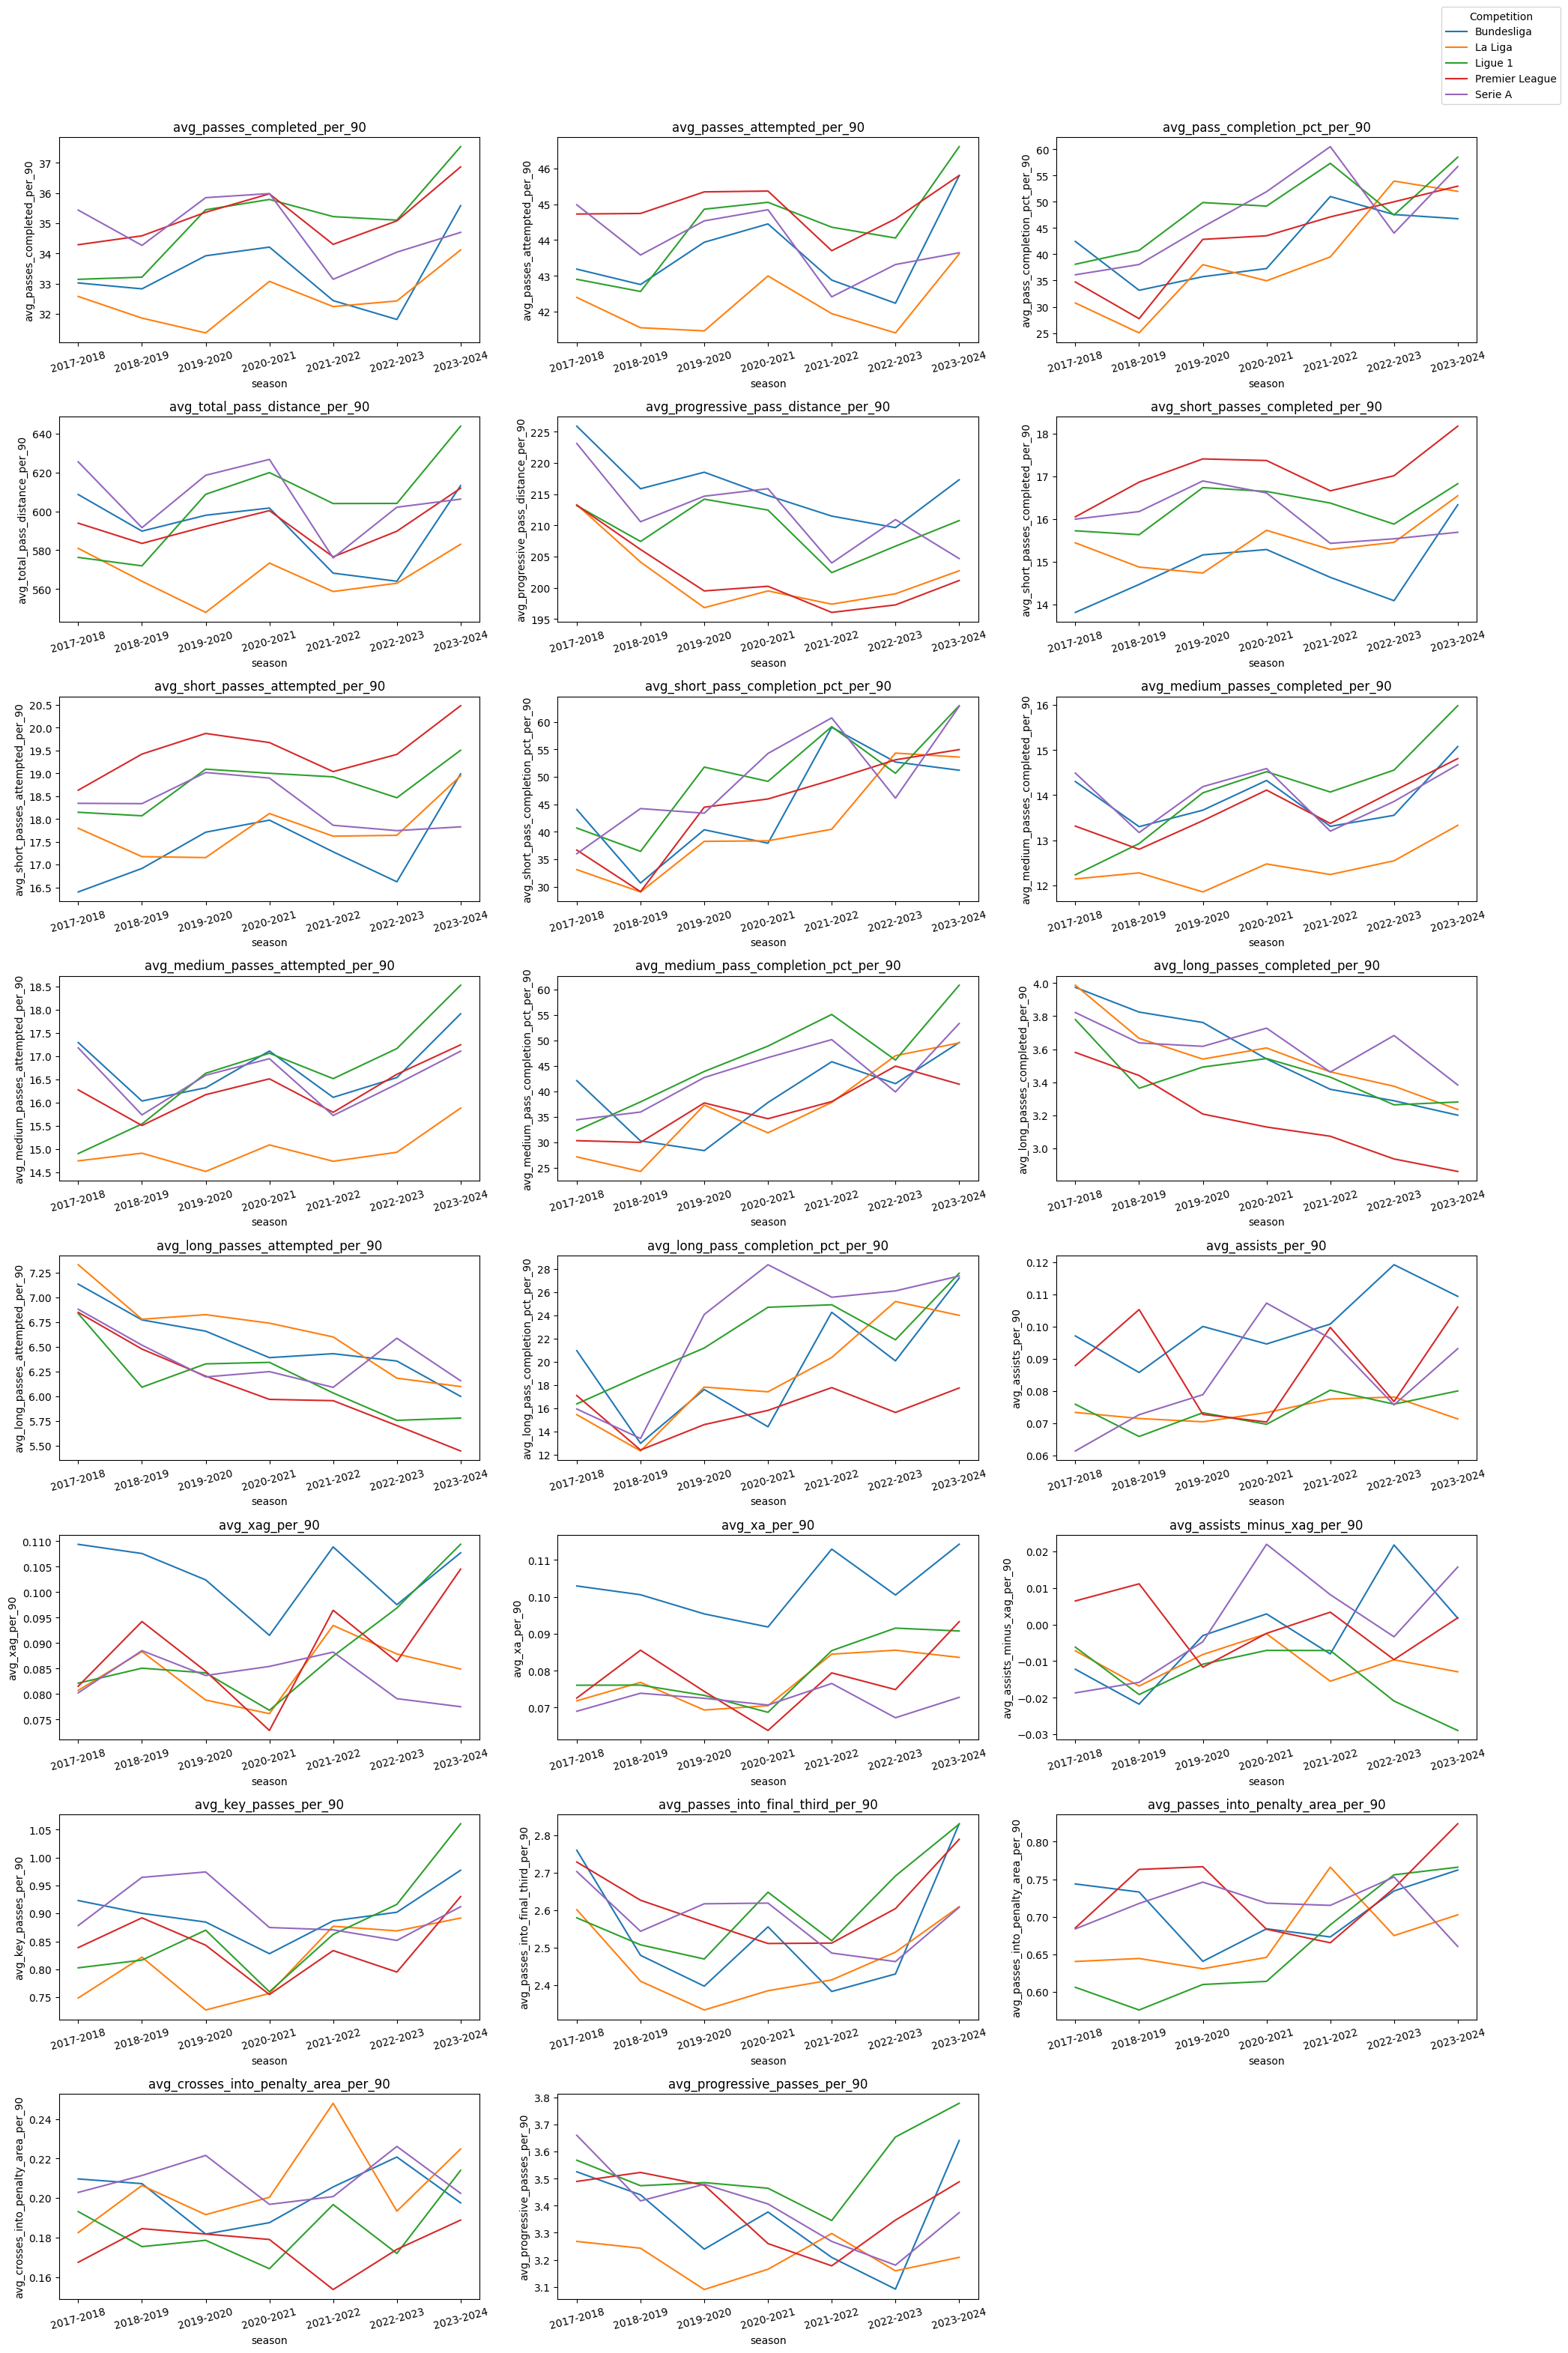

In [28]:
fig, axes = plt.subplots(figsize=(20, 30), nrows=8, ncols=3)

# remove empty subplots
for i in range(len(avgs_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])


for stat, ax in zip(avgs_cols, axes.flatten()):
    sns.lineplot(data=avgs_df, x='season', y=stat, hue='comp', ax=ax)
    ax.set_title(stat)
    ax.get_legend().remove() 
    plt.setp(ax.get_xticklabels(), rotation=15)
    
# set legend
handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(1, 1), title='Competition')

plt.tight_layout()
plt.show()

In [29]:
df.head()

rk               player nation    pos           squad            comp  \
0   1  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA     DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN     DF       Marseille         Ligue 1   

    age    born   90s  passes_completed  passes_attempted  \
0  26.0  1990.0  24.3             884.0            1176.0   
1  21.0  1995.0   1.5              29.0              44.0   
2  21.0  1995.0   5.7              87.0             120.0   
3  30.0  1986.0  11.7             625.0             776.0   
4  27.0  1989.0   5.5             310.0             333.0   

   pass_completion_pct  total_pass_distance  progressive_pass_distance  \
0                 75.2              14197.0                     6422.0   
1                 65.9                376.0                       77.0   
2                 72.5               1174.0                      325.0   
3                 80.5              10991.0                     4535.0   
4                 93.1               5550.0                     1557.0   

   short_passes_completed  short_passes_attempted  short_pass_completion_pct  \
0                   479.0                   532.0                       90.0   
1                    24.0                    30.0                       80.0   
2                    50.0                    60.0                       83.3   
3                   273.0                   294.0                       92.9   
4                   126.0                   128.0                       98.4   

   medium_passes_completed  medium_passes_attempted  \
0                    311.0                    431.0   
1                      2.0                      5.0   
2                     25.0                     35.0   
3                    287.0                    333.0   
4                    148.0                    155.0   

   medium_pass_completion_pct  long_passes_completed  long_passes_attempted  \
0                        72.2                   74.0                  152.0   
1                        40.0                    2.0                    3.0   
2                        71.4                    4.0                    8.0   
3                        86.2                   58.0                  120.0   
4                        95.5                   24.0                   34.0   

   long_pass_completion_pct  assists  xag   xa  assists_minus_xag  key_passes  \
0                      48.7        1  2.1  1.8               -1.1        18.0   
1                      66.7        0  0.0  0.0                0.0         0.0   
2                      50.0        0  0.2  0.1               -0.2         3.0   
3                      48.3        0  0.5  0.8               -0.5        10.0   
4                      70.6        0  0.0  0.0                0.0         0.0   

   passes_into_final_third  passes_into_penalty_area  \
0                     63.0                      28.0   
1                      2.0                       1.0   
2                      8.0                       7.0   
3                     55.0                      20.0   
4                      8.0                       0.0   

   crosses_into_penalty_area  progressive_passes     season general_pos  \
0                        6.0                92.0  2017-2018    Defender   
1                        1.0                 3.0  2017-2018  Midfielder   
2                        1.0                17.0  2017-2018  Midfielder   
3                        7.0                81.0  2017-2018    Defender   
4                        0.0                12.0  2017-2018    Defender   

  age_range      country continent  player_id  passes_completed_per_90  \
0     25-29  Netherlands    Europe          1                36.378601   
1     20-24      England

In [30]:
# filter for players who have played more than 15 90s
data = df.loc[df['90s'] > 15].reset_index(drop=True)

In [31]:
# get correlations between per 90 stats
stat_plots_2 = StatisticPlots(data)

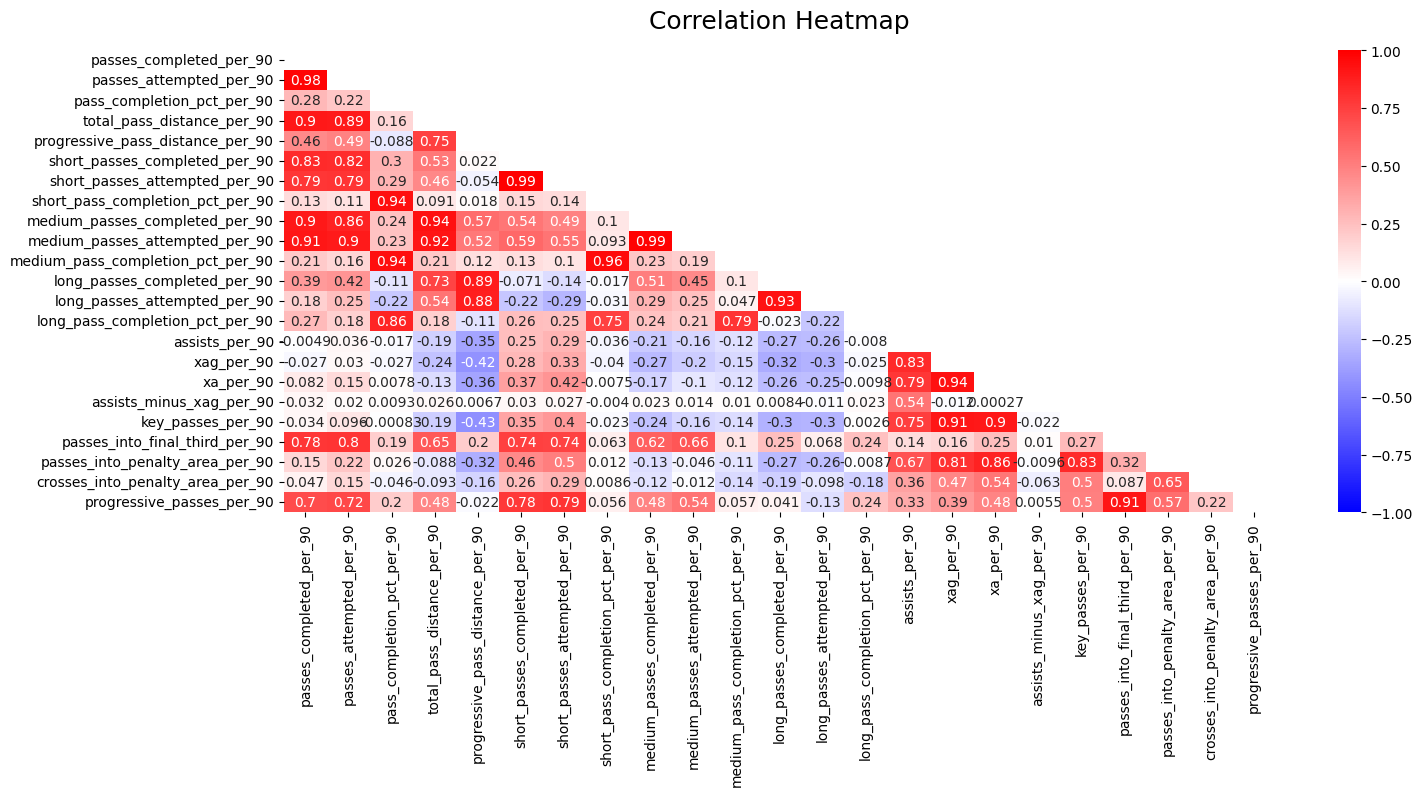

In [32]:
stat_plots_2.correlation_matrix(vars=per_90_cols)

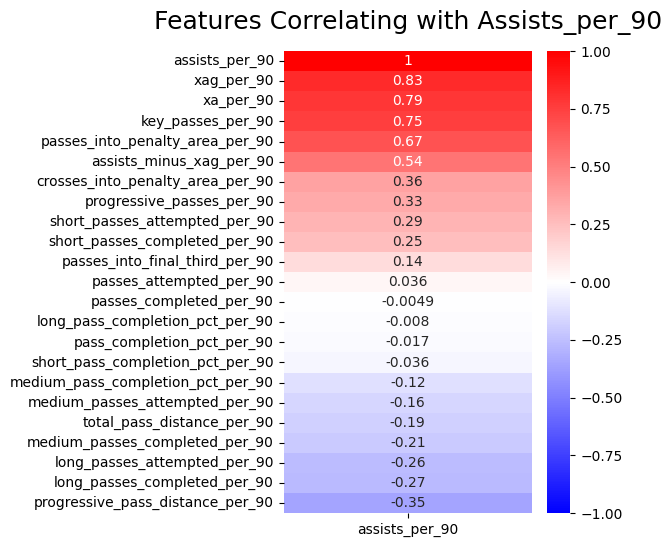

In [33]:
stat_plots_2.dependent_correlations(y_var='assists_per_90', vars=per_90_cols)

In [34]:
# who are the top players for each stat for each season
seasons = data['season'].unique()

In [35]:
index = data.loc[data['season'] == '2020-2021', 'passes_completed_per_90'].idxmax()
data.iloc[[index]]

rk          player nation pos      squad     comp   age    born   90s  \
4888  2680  Marco Verratti    ITA  MF  Paris S-G  Ligue 1  27.0  1992.0  16.6   

      passes_completed  passes_attempted  pass_completion_pct  \
4888            1632.0            1792.0                 91.1   

      total_pass_distance  progressive_pass_distance  short_passes_completed  \
4888              23144.0                     7243.0                   932.0   

      short_passes_attempted  short_pass_completion_pct  \
4888                   980.0                       95.1   

      medium_passes_completed  medium_passes_attempted  \
4888                    511.0                    553.0   

      medium_pass_completion_pct  long_passes_completed  \
4888                        92.4                   91.0   

      long_passes_attempted  long_pass_completion_pct  assists  xag   xa  \
4888                  131.0                      69.5        2  2.4  2.9   

      assists_minus_xag  key_passes  passes_into_final_third  \
4888               -0.4        24.0                    173.0   

      passes_into_penalty_area  crosses_into_penalty_area  progressive_passes  \
4888                      33.0                        1.0               188.0   

         season general_pos age_range country continent  player_id  \
4888  2020-2021  Midfielder     25-29   Italy    Europe       2431   

      passes_completed_per_90  passes_attempted_per_90  \
4888                98.313253               107.951807   

      pass_completion_pct_per_90  total_pass_distance_per_90  \
4888                    5.487952                 1394.216867   

      progressive_pass_distance_per_90  short_passes_completed_per_90  \
4888                        436.325301                      56.144578   

      short_passes_attempted_per_90  short_pass_completion_pct_per_90  \
4888                      59.036145                          5.728916   

      medium_passes_completed_per_90  medium_passes_attempted_per_90  \
4888                       30.783133                       33.313253   

      medium_pass_completion_pct_per_90  long_passes_completed_per_90  \
4888                           5.566265                      5.481928   

      long_passes_attempted_per_90  long_pass_completion_pct_per_90  \
4888                      7.891566                         4.186747   

      assists_per_90  xag_per_90  xa_per_90  assists_minus_xag_per_90  \
4888        0.120482    0.144578   0.174699                 -0.024096   

      key_passes_per_90  passes_into_final_third_per_90  \
4888           1.445783                       10.421687   

      passes_into_penalty_area_per_90  crosses_into_penalty_area_per_90  \
4888                         1.987952                          0.060241   

      progressive_passes_per_90  
4888                  11.325301

In [36]:
def top_per_season(
    data: pd.DataFrame,
    stats: list[str],
    figsize: tuple[int, int] = (20, 30),
    nrows: int = 8,
    ncols: int = 3,
) -> None:

    fig, axes = plt.subplots(figsize=figsize, nrows=nrows, ncols=ncols)

    # remove empty subplots
    for i in range(len(stats), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

    for stat, ax in zip(stats, axes.flatten()):
        indexes = data.groupby("season")[stat].idxmax().values
        df = data.iloc[indexes]
        df["player_season"] = df["player"] + " " + df["season"]

        plots = sns.barplot(
            data=df,
            y="player_season",
            x=stat,
            # palette="Blues_r",
            # hue="player",
            legend=False,
            ax=ax,
        )
        for bar in plots.patches:
            plots.annotate(
                format(bar.get_width(), ".2f"),
                (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                ha="left",
                va="center",
                size=10,
                xytext=(5, 0),
                textcoords="offset points",
            )
        ax.set_title(f"Top {stat} for each season")
        ax.set_ylabel("Player & Season")

    plt.tight_layout()
    plt.show()

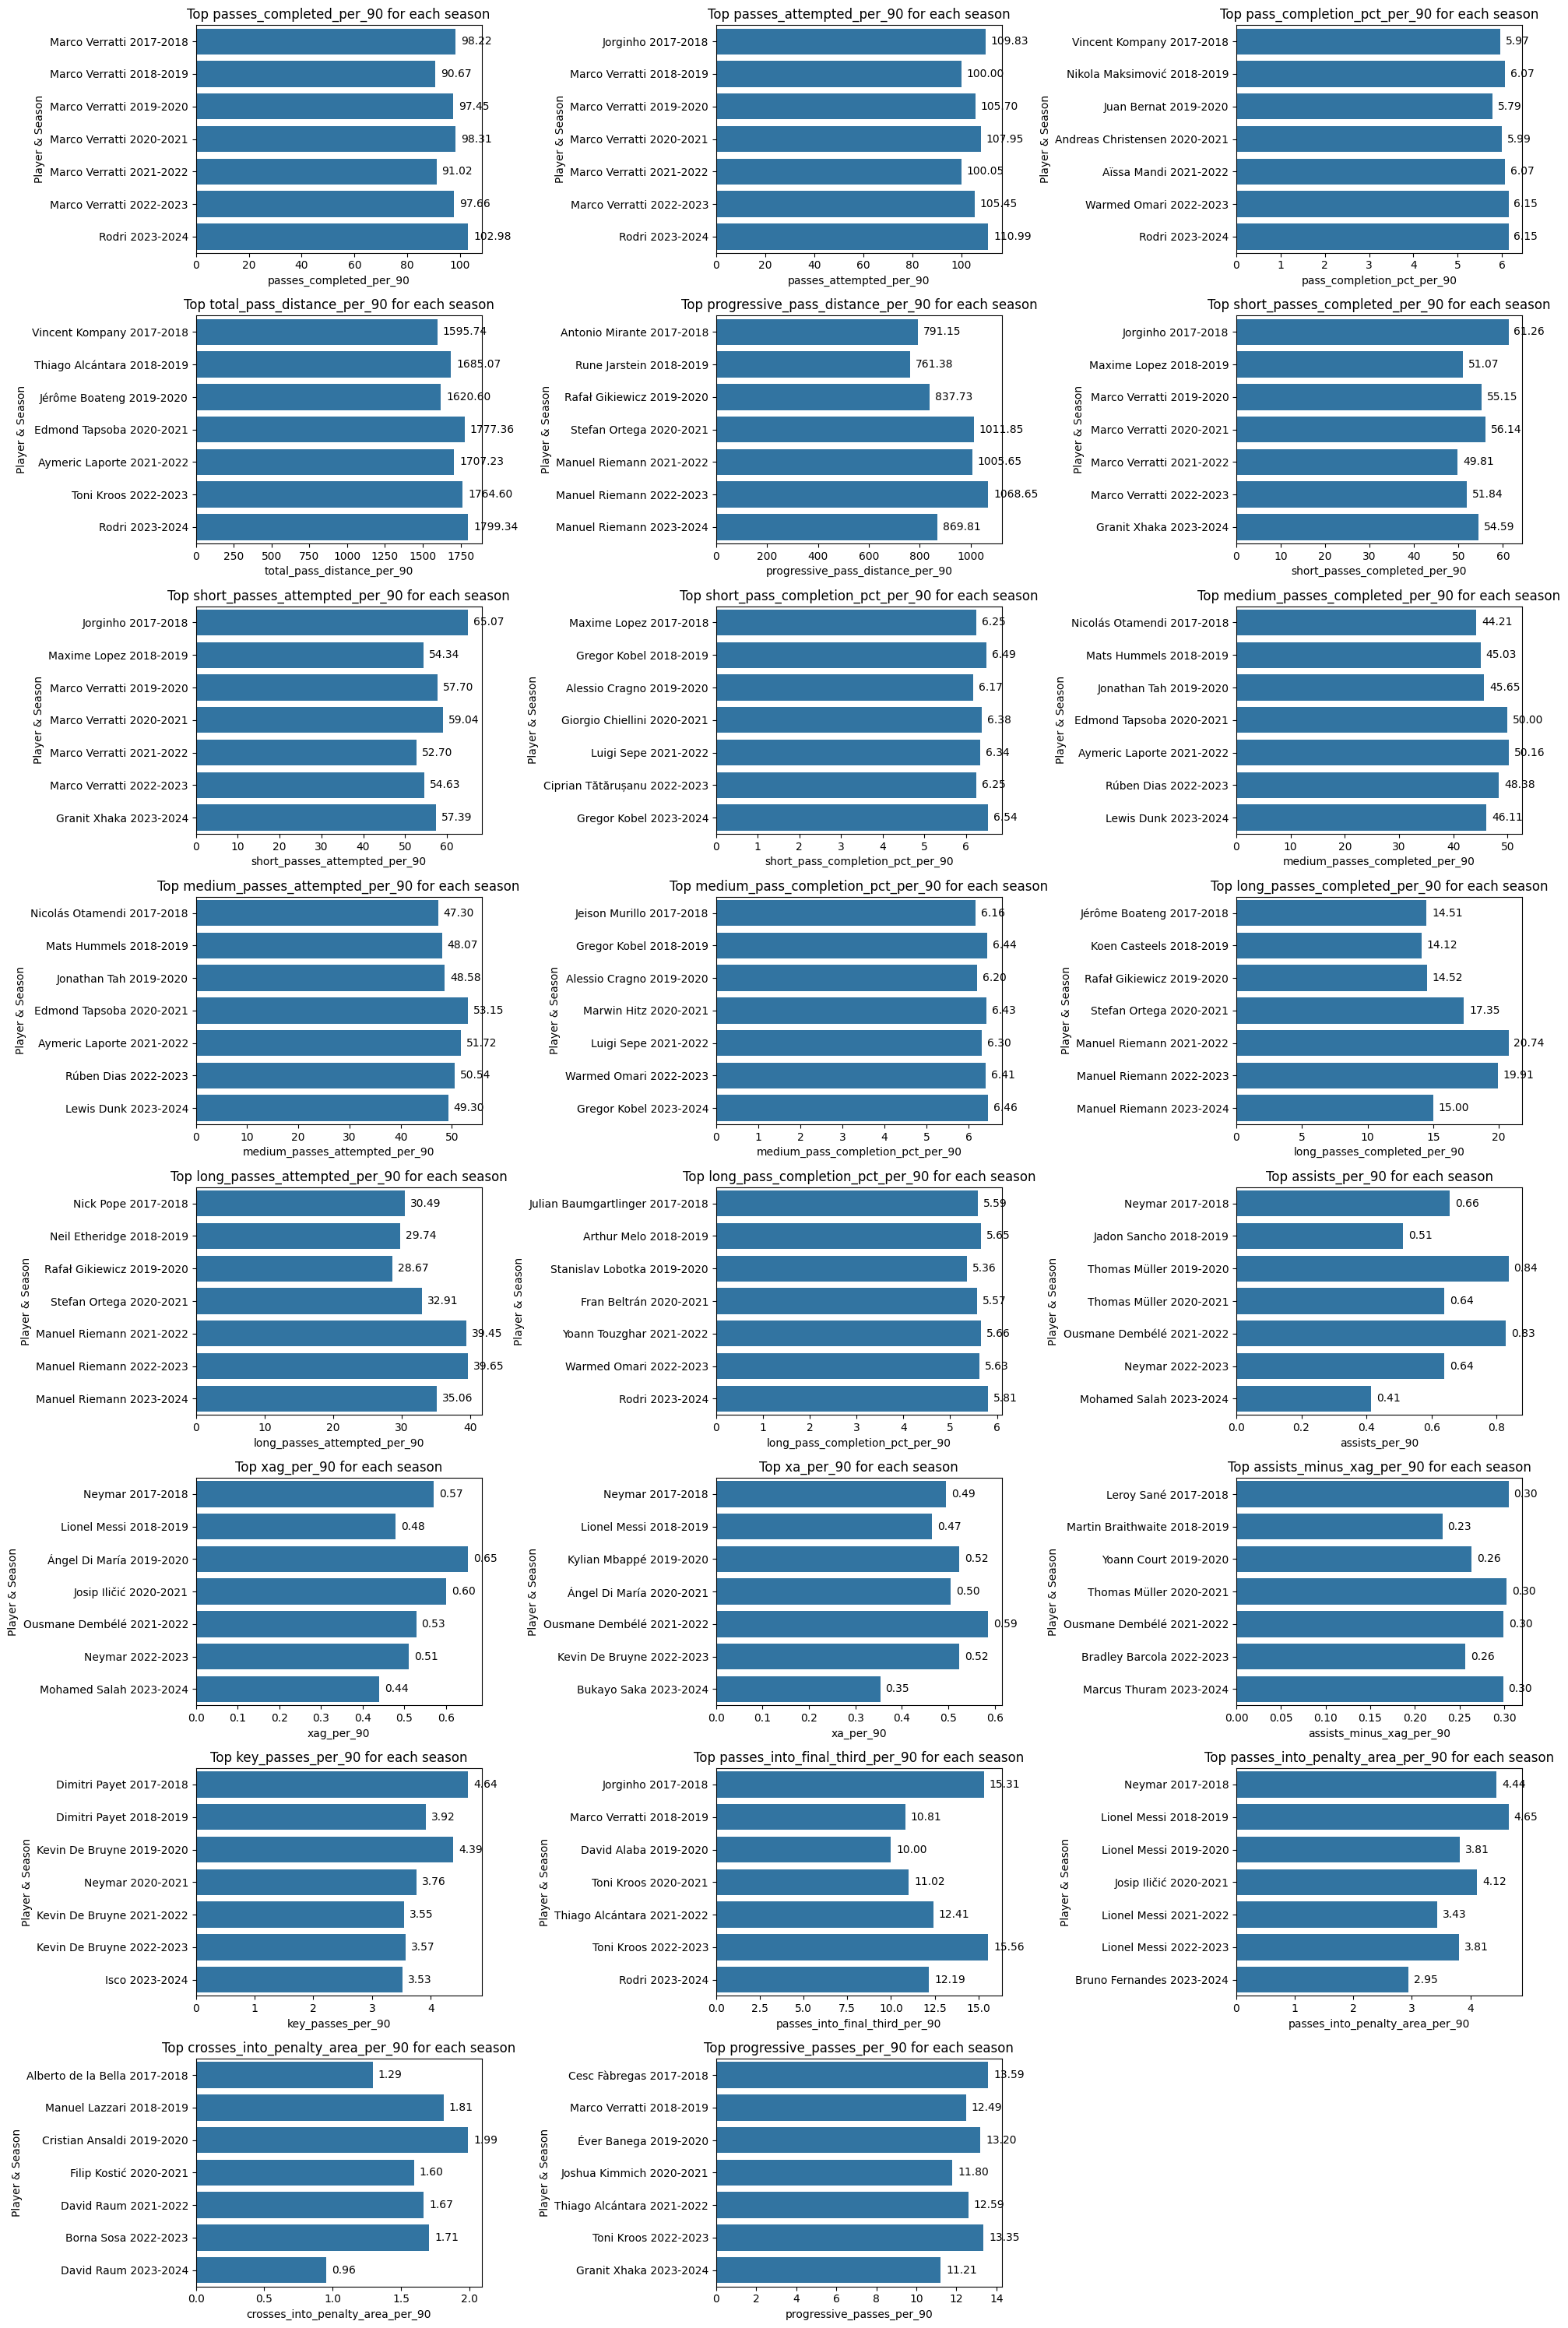

In [37]:
top_per_season(data, per_90_cols)

In [38]:
# get non per 90 stats
non_per_90_cols = [col for col in data.columns[9:] if 'per_90' not in col]
non_per_90_cols = non_per_90_cols[:-5]

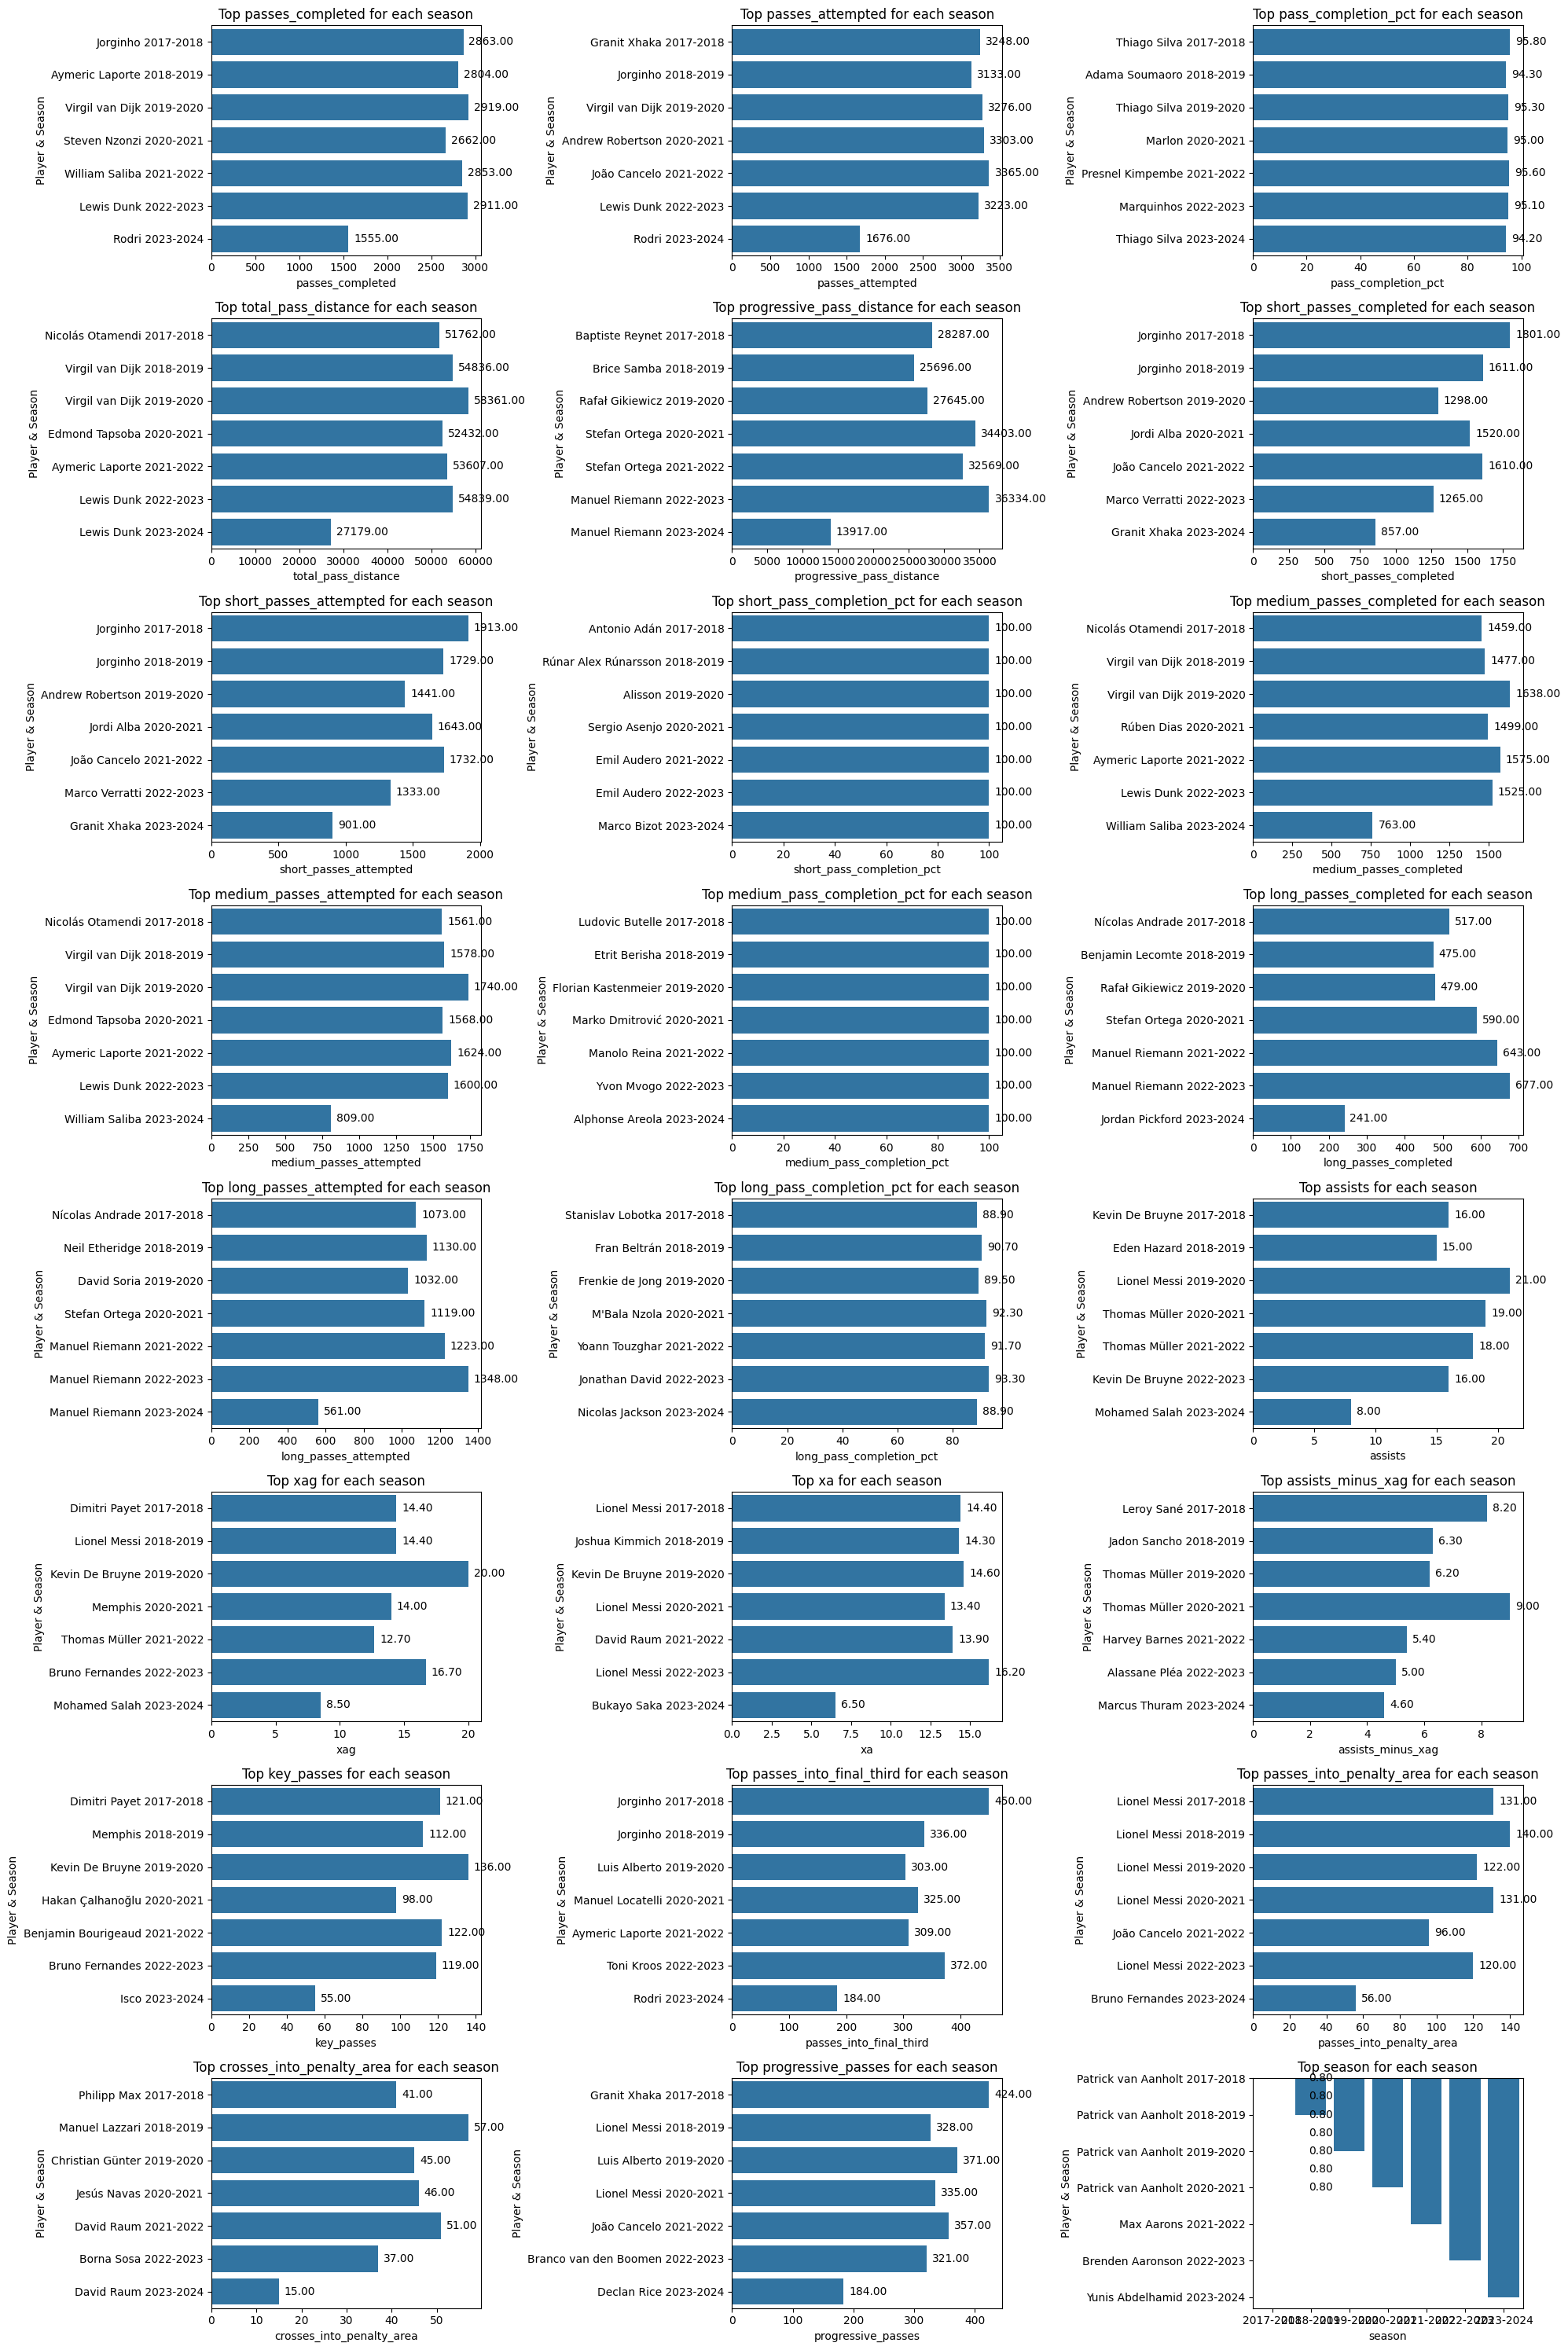

In [39]:
top_per_season(data, non_per_90_cols)

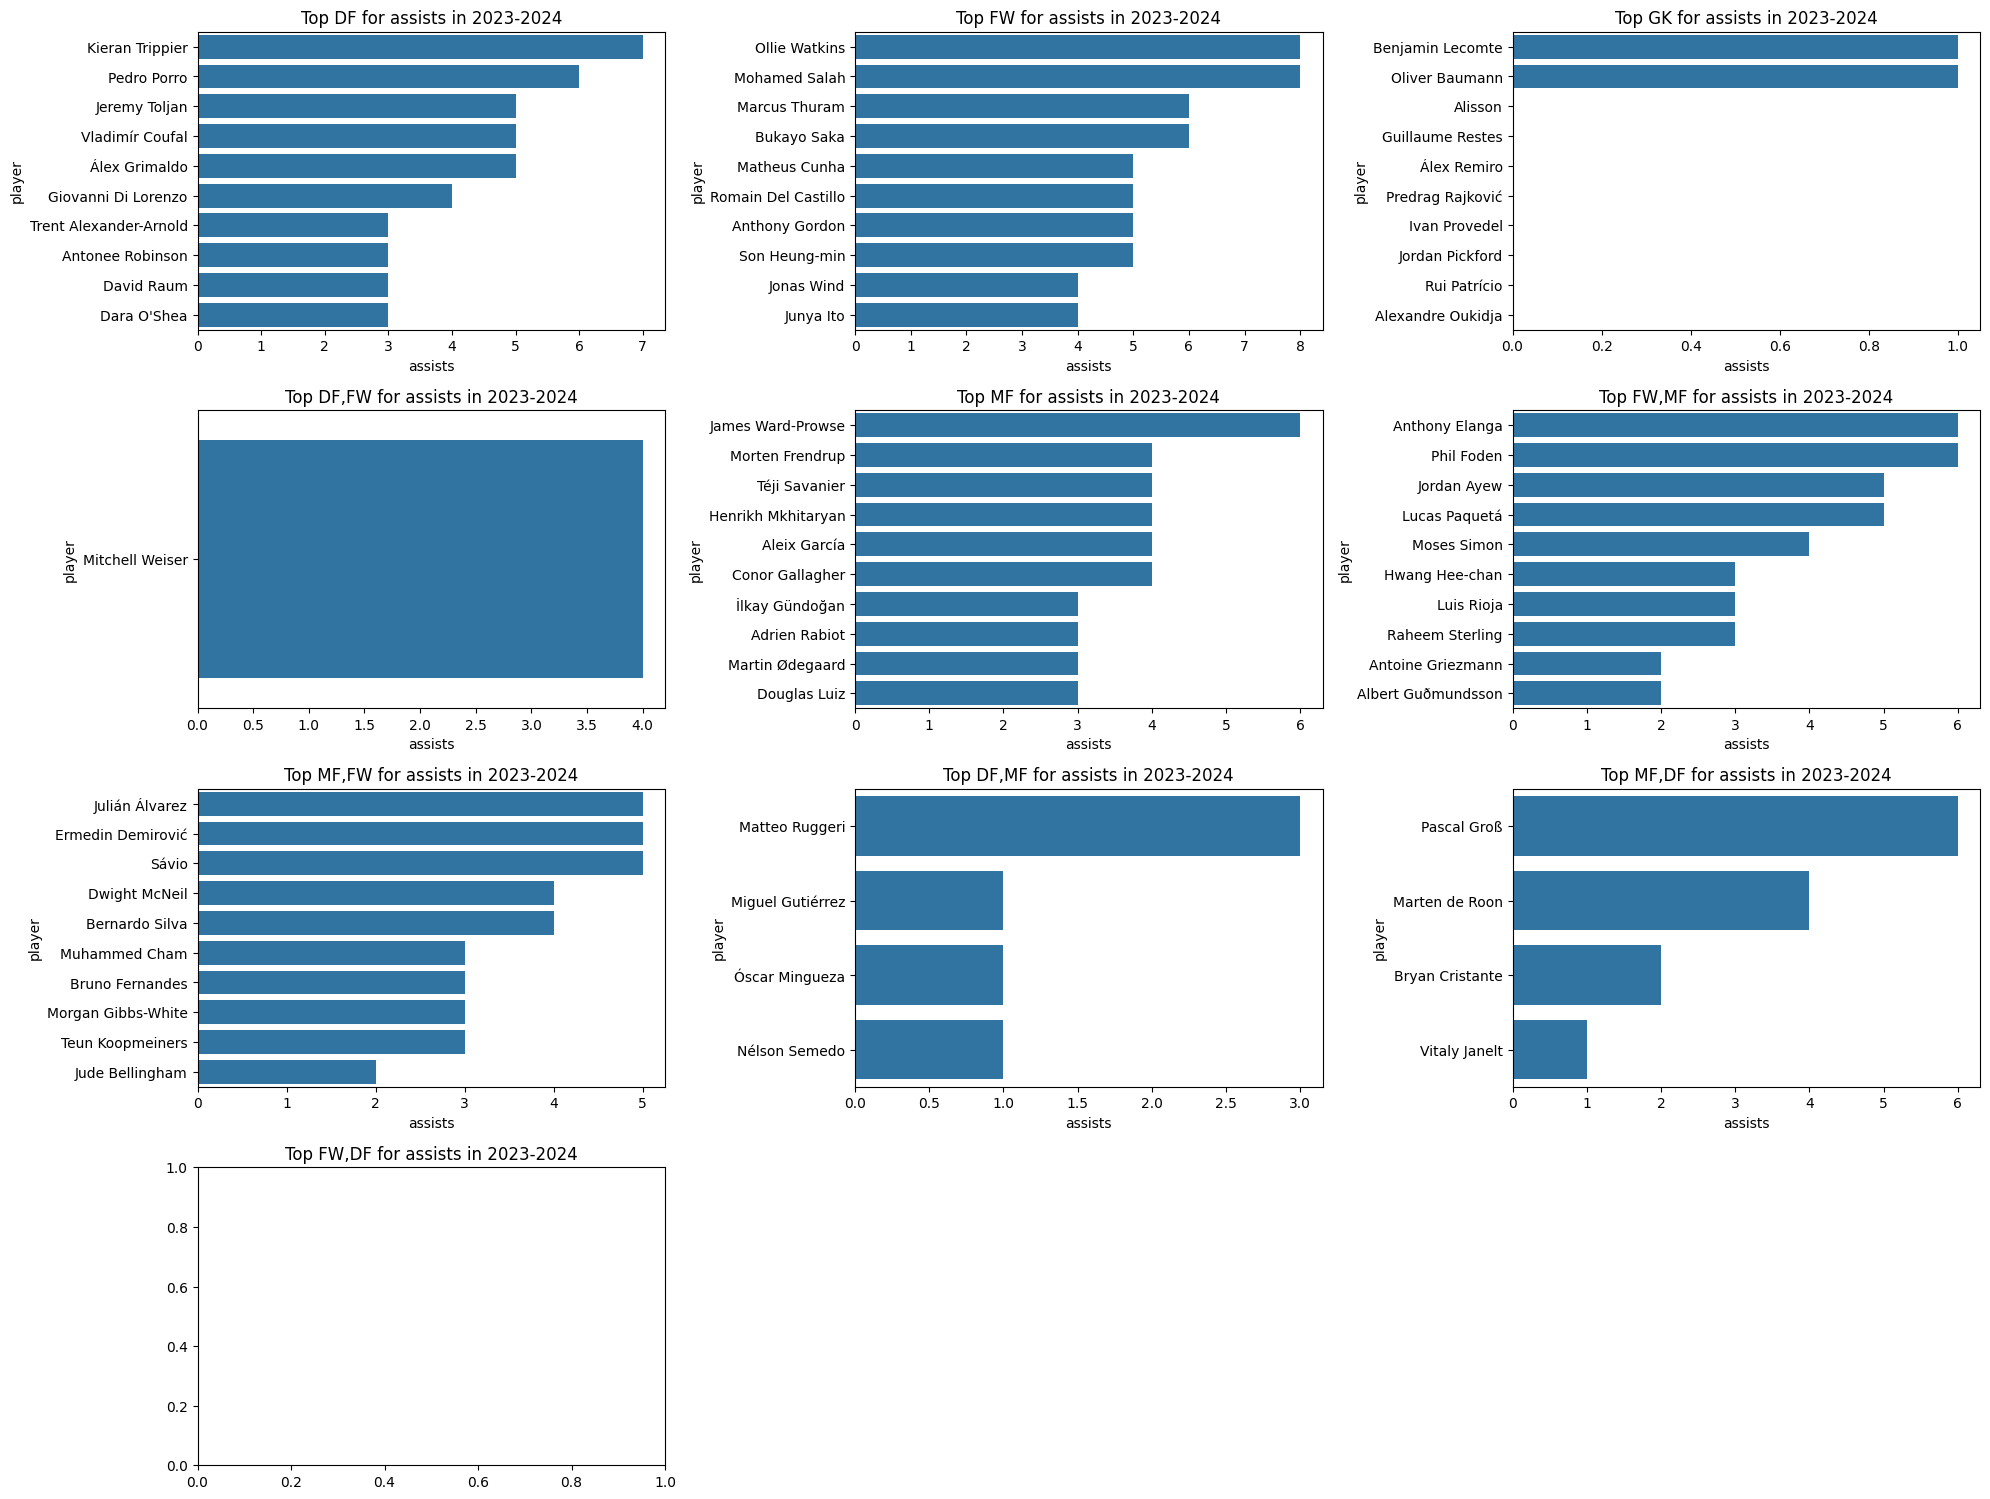

In [40]:
# best performances for each stat
positions = data["pos"].unique().tolist()
fig, axes = plt.subplots(figsize=(20, 30), nrows=8, ncols=3)

# remove empty subplots
for i in range(len(positions), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

for pos, ax in zip(positions, axes.flatten()):
    df = (
        data.loc[(data["pos"] == pos) & (data["season"] == "2023-2024")]
        .sort_values("assists", ascending=False)
        .head(10)[
            ["player", "nation", "squad", "age", "90s", "assists_per_90", "assists"]
        ]
    )
    sns.barplot(
        data=df,
        y="player",
        x="assists",
        # palette="Blues_r",
        # hue="squad",
        dodge=False,
        ax=ax,
    )
    ax.set_title(f"Top {pos} for assists in 2023-2024")
    
plt.tight_layout()
plt.show()